In [1]:
pip install -Uqq fastbook

Note: you may need to restart the kernel to use updated packages.


In case "Add persistent_workers class variable to FakeLoader " error

please downgrade py torch version by using -> `conda install pytorch==1.6.0 torchvision==0.7.0 -c pytorch` command

* https://github.com/fastai/fastai/pull/2878
* https://github.com/lgvaz/faststyle/pull/18


In [1]:
from sklearn.metrics import classification_report

from fastai.tabular.all import *
from fastai.basics import *
from fastai import *

import numpy as np
import pandas as pd
import glob
# torch.set_num_threads(10)
defaults.device = torch.device('cpu')

In [21]:
# load the baseline model
#learn.load('TubularLearner.fastAI._stage1')
deployed_path = "/mnt/vdb/thesis/TubularLearner.III._200.retrain"
#deployed_path = "TubularLearner.fastAI._stage2.pth"
learner = load_learner(deployed_path)



In [22]:
learner.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(1900, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(1900, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1900, out_features=1211, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(1211, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1211, out_features=1211, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): BatchNorm1d(1211, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1211, out_features=1211, bias=False)
      (2): ReLU(inplace=True)
    )
    (3): LinBnDrop(
      (0): BatchNorm1d(1211, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1211, o

In [23]:

df = pd.read_pickle("../datasets/truthset/AMPs_truthset.reps.plk")
ready_df =df[[ "reps"]]

In [3]:
def lengthDistribution(df,title):
    fig = plt.figure()
    ax = fig.gca()
    pd.Series(df['length']).hist(color='blue', bins=200, ax=ax)
    plt.ylabel('Num of Seq with this length ')
    plt.xlabel('Length of Seq')
    plt.title(title)

def plotCharDistribution(dict_counts, char_totalsize, title):
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(111)
    # The bar chart, with letters along the horizontal axis and the calculated
    # letter frequencies as percentages as the bar height
    x = range(len(dict_counts))
    letters =  dict_counts.keys()
    ax.bar(x, [val / char_totalsize * 100 for key,val in dict_counts.items()], width=0.8,
        color='g', alpha=0.5, align='center')
    ax.set_xticks(x)
    ax.set_xticklabels(letters)
    ax.tick_params(axis='x', direction='out')
    ax.set_xlim(-0.5, 25.5)
    ax.yaxis.grid(True)
    ax.set_ylabel('Letter frequency, %')

def countProtien(df, title):
    # count Sequence 
    records = df['seq']
    print("Count Records:", len(records))
    # countAminoAcids
    counts = Counter()
    for index, row in df.iterrows():
        line= row['seq']
        counts.update(line.rstrip())
        total = float(sum(counts.values()))
    sorted_dict = {key: value for key, value in sorted(counts.items())}
    for key,val in sorted_dict.items():
        print("{}: {}, ({:.2%})".format(key,val, val / total))

    plotCharDistribution(sorted_dict, total, title)

Count Records: 62
A: 230, (5.87%)
C: 228, (5.81%)
D: 131, (3.34%)
E: 315, (8.03%)
F: 144, (3.67%)
G: 311, (7.93%)
H: 143, (3.65%)
I: 205, (5.23%)
K: 286, (7.29%)
L: 314, (8.01%)
M: 72, (1.84%)
N: 110, (2.81%)
P: 145, (3.70%)
Q: 262, (6.68%)
R: 237, (6.04%)
S: 212, (5.41%)
T: 142, (3.62%)
V: 299, (7.63%)
W: 64, (1.63%)
Y: 71, (1.81%)


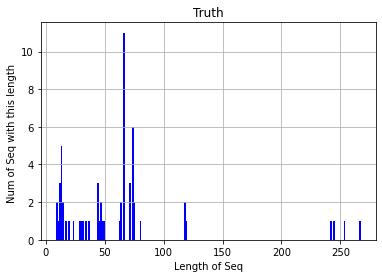

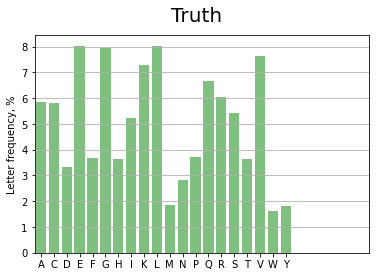

In [7]:
lengthDistribution(df,"Truth")
countProtien(df,"Truth")  # "B|Z|J|U|O"

## Chanage format

In [24]:
df_new = ready_df.reps.apply(pd.Series).astype(np.float64)
df_new.columns = df_new.columns.astype(str)
#to = TabularPandas(df_new , cont_names =reps_columns, y_block = CategoryBlock, splits=splits)

In [25]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,0.019923,-0.047088,0.007590,0.008612,-0.105413,0.032731,-0.297581,-0.010141,-0.018119,0.102418,...,0.047615,0.063532,-0.237826,0.039653,-0.031136,-0.006353,0.039390,0.007629,0.089423,0.022756
1,0.014724,-0.030932,0.007524,0.013040,0.047267,0.032513,-0.456108,0.001002,-0.018511,0.141110,...,0.040018,0.072904,-0.216747,0.028120,-0.036611,-0.004548,0.061547,0.045790,0.103151,0.000341
2,0.018701,-0.055086,-0.007485,0.018340,0.027769,0.043306,-0.380586,0.005666,-0.021887,0.109023,...,0.042081,0.087484,-0.214472,0.029637,-0.015207,-0.016494,0.060464,0.010968,0.061983,0.013685
3,0.019437,-0.031499,0.001900,0.012346,0.067398,0.023426,-0.267920,-0.002214,-0.018159,0.091275,...,0.051911,0.080598,-0.181252,0.030322,-0.044635,-0.007344,0.081058,0.017975,0.128263,0.028620
4,0.033317,-0.097852,0.010363,0.020239,-0.232632,0.049497,-0.299169,0.012850,-0.023980,0.337575,...,0.033375,0.120847,-0.100889,0.020196,-0.042631,0.023899,0.053246,0.001743,0.185660,0.020270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.016171,0.000104,0.001302,0.014256,0.017668,-0.001196,-0.343563,-0.265699,-0.016795,0.055140,...,0.024991,0.022828,-0.073042,0.017890,0.013226,-0.123560,0.154960,-0.013497,0.031413,-0.043297
58,0.015017,-0.036066,0.038192,0.003745,-0.003776,0.009892,-0.153868,-0.129352,-0.015966,0.075090,...,0.017711,0.006127,-0.039396,-0.001067,-0.054788,0.044370,0.132005,0.039209,-0.042818,-0.024418
59,0.032130,-0.000488,-0.014703,0.031483,0.013354,0.035091,-0.428796,0.013158,-0.035880,0.128336,...,0.044803,0.096227,-0.195344,0.034177,0.018314,-0.049155,0.140474,0.044257,0.071362,-0.001932
60,0.025432,0.006171,-0.012787,0.026035,-0.040039,0.050619,-0.472542,-0.001317,-0.029686,0.191039,...,0.035620,0.075275,-0.103784,0.032539,0.011790,0.012831,0.180955,0.092308,0.256334,-0.000305


## Predict Truthset
To get prediction on a new dataframe, you can use the test_d

In [26]:
dl = learner.dls.test_dl(df_new)
_preds,_none ,_y = learner.get_preds(dl=dl, with_decoded=True)

In [27]:
df['class'] = _y
df.drop(columns=['reps'],inplace =True)
df

,ID,paper,seq,length,class
0,ISGCock_Contig04_0915,PMC4864078,ALQICTRNMIDDRLPYVADNVRPGTFIKQQRKQKQQRHHTSGTRKRMAKG,50,0
1,ISGCock_Contig13_4610,PMC4864078,HLYPCKLNLKLGKVPFHFLNLNHKGKSIMVNQQTCLYYIICQTR,44,1
2,ISGCock_Contig16_2060,PMC4864078,ISHNHLTAASITHVKNRGKYIYMHLKFRKTNVLI,34,1
3,ISGCock_Contig16_4974,PMC4864078,RKKVWFIFHVCPKLKQRILSDTHAKNKCRLSPLLIKSTKIKNET,44,0
4,ISGCock_Contig07_3736,PMC4864078,CNYISFFRKCKNSQSTMYGCHRMNKCVFSSY,31,0
...,...,...,...,...,...
57,TR42258|c1_g1_i1,hal-02965337,MRYIVCFVFFLFFFLLFLWLVPARTASSFLTPRLSSLGKRSWAV,44,1
58,TR27534|c0_g1_i1,hal-02965337,MLFKVIIVIWISVCRECTRGGFCNFMHLKPISRELRRELYGRTRRRRK,48,0
59,P3,S2162-2531(20)30132-3,FWELWKFLKSLWSIFPRRRP,20,0
60,P10,S2162-2531(20)30132-3,ICTTLNWMVKLTCLTHVTLTTRWC,24,0


In [28]:
df[df["class"] == 1] 

,ID,paper,seq,length,class
1,ISGCock_Contig13_4610,PMC4864078,HLYPCKLNLKLGKVPFHFLNLNHKGKSIMVNQQTCLYYIICQTR,44,1
2,ISGCock_Contig16_2060,PMC4864078,ISHNHLTAASITHVKNRGKYIYMHLKFRKTNVLI,34,1
7,ISGCock_Contig05_0593,PMC4864078,MKTFLRLYRSLINKVLHV,18,1
8,ISGCock_Contig12_4176,PMC4864078,VVGRKHSILNCIPYLKKKKIMRLVESESIG,30,1
9,ISGCock_Contig15_1337,PMC4864078,KRMKLNAKKLSFCDHLNSYLNLSPTLFIHNSSKQWSHWLWHNGIRI,46,1
17,Ph14,insects11100676,RRRCRCCRY,9,1
52,Blattellicin_g1,s41598-020-77982-3,MKITAITFLVMSIAVASSFGRPQGTEEEIQKKLKETFKENGVMVLLERIEQRLIGFGAPMFNSSEELFGERKKERLEKVQESVETAEESEQEQQEQQEQQQQQEQQEQQEQQEHQEQQEHQEQQEHQEQQEHQEHQEHQEQPEQEHQEQPEQEQQEQQEQQEQQEQEPEPVPAPRLVRSALPEDQSEGIHAGINQQPGVGTVVDVSGRKNVYETDDGRGRVNVEGQWSKVIDGPGRGKPQAGAGINFEYKFRK,253,1
54,Blattellicin_g3,s41598-020-77982-3,MKITAITFLVLSIAVATSFGRPQATEEEIQKKLKETFKENGVMVLLERIEQRLIGFGAPMFDSPEELFGERKKERLEKIQESVETAEESEQEQQEQEQQEHQEQQEHQEQQEHQEQQEHQEQPEQEHQEQPEQEHQEQPEQEHQEQPEHEQQEQQEQQEQQEQQEQQEQQEQHEQEQQEQEPELVPASRLVRSALPEDQSEGIHAGINQQPGVGTVVDVSGRKNVYETDDGRGRVNVEGQWSKVIDGPGREKPQAGAGINFEYKFRK,267,1
55,Blattellicin_g4,s41598-020-77982-3,MKITAITFLVMSIAVASSFGRPQTTEEEIQKKLKETFKENGFMVLLEKIEQRLIGFGAPMFDSPEELFGEIKKERLEKVQESVETAEESEQEHQEQQEHQEQQEHQEQQEHQEQPEQEHQEQPEQEHQEQPEHEQQEQQEQQEQQEQQEQHEQEQQEQEPEPVPAPRLVRSARPEDQSEGIHAGINQQPGVGTVVDVSGRKNIYETDDGRGRVNVEGQWSKVIDGPGRGKPQAGAGINFEYKFRK,245,1
56,TR36613|c0_g1_i1,hal-02965337,MKMISRKESLKAPHLSLLISMLHGVGLANYWLLVLRRLLITKKVMWF,47,1


Basic Check

check these data exist in training set

# Predict on Shuffled sequences

In [29]:
def predict(_df ,condition):
    #df = _df.loc[_df.length > 30 ].copy() 
    #df = _df.loc[_df.length <= 30 ].copy()
    if condition == 0:
        df = _df.copy()
    elif condition == -1 :
        df = _df.loc[_df.length <= 30 ].copy()
    else:
        df = _df.loc[_df.length > condition ].copy() # select records with lenght > 
    #print(df.columns)
    ready_df = df[[ "reps"]]
    df_new = ready_df.reps.apply(pd.Series).astype(np.float64)
    df_new.columns = df_new.columns.astype(str)
    dl = learner.dls.test_dl(df_new)
    _preds,_none ,_y = learner.get_preds(dl=dl, with_decoded=True)
    df['class'] = _y
    #df.drop(columns=['reps'],inplace =True)
    accuracy = (len(df[df["class"] == 1])/len(df) )*100
    #print("predict AMP :"+str(len(df[df["class"] == 0])))
    #print("predict NonAMP:"+str(len(df[df["class"] == 1])))
    #print("predict NonAMP (in percentage):"+str(accuracy))
    return len(df[df["class"] == 1])

## Retrain with <= 200 AA

In [17]:
deployed_path = "/mnt/vdb/thesis/TubularLearner.III._480.nodropout.retrain"
#deployed_path = "TubularLearner.fastAI._stage2.pth"
learner = load_learner(deployed_path)

In [30]:
result_df = pd.DataFrame( columns=["no_con",">200",">100",">70",">50",">30","30<="],
    index = ['shuff1','shuff2', 'shuff3',"shuff4","shuff5","shuff6","shuff7","shuff8","shuff9","shuff10"])
# shuff1
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_42.reps.plk")
result_df.loc['shuff1', 'no_con']=predict(df_,0)
result_df.loc['shuff1', '>200']= predict(df_,200)
result_df.loc['shuff1', '>100']=predict(df_,100)
result_df.loc['shuff1', '>70']=predict(df_,70)
result_df.loc['shuff1', '>50']=predict(df_,50)
result_df.loc['shuff1', '>30']=predict(df_,30)
result_df.loc['shuff1', '30<=']=predict(df_,-1)
# shuff2
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_43.reps.plk")
result_df.loc['shuff2', 'no_con']=predict(df_,0)
result_df.loc['shuff2', '>200']= predict(df_,200)
result_df.loc['shuff2', '>100']=predict(df_,100)
result_df.loc['shuff2', '>70']=predict(df_,70)
result_df.loc['shuff2', '>50']=predict(df_,50)
result_df.loc['shuff2', '>30']=predict(df_,30)
result_df.loc['shuff2', '30<=']=predict(df_,-1)
# shuff3
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_44.reps.plk")
result_df.loc['shuff3', 'no_con']=predict(df_,0)
result_df.loc['shuff3', '>200']= predict(df_,200)
result_df.loc['shuff3', '>100']=predict(df_,100)
result_df.loc['shuff3', '>70']=predict(df_,70)
result_df.loc['shuff3', '>50']=predict(df_,50)
result_df.loc['shuff3', '>30']=predict(df_,30)
result_df.loc['shuff3', '30<=']=predict(df_,-1)
# shuff4
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_45.reps.plk")
index = "shuff4"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff5
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_46.reps.plk")
index = "shuff5"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff6
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_47.reps.plk")
index = "shuff6"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff7
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_48.reps.plk")
index = "shuff7"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff8
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_49.reps.plk")
index = "shuff8"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff9
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_50.reps.plk")
index = "shuff9"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff10
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_51.reps.plk")
index = "shuff10"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)

result_df

,no_con,>200,>100,>70,>50,>30,30<=
shuff1,22,4,7,13,14,19,3
shuff2,29,4,6,13,24,29,0
shuff3,16,4,6,10,12,16,0
shuff4,13,4,7,8,8,12,1
shuff5,20,4,7,12,12,19,1
shuff6,24,4,7,11,15,21,3
shuff7,14,4,6,9,9,12,2
shuff8,23,4,7,13,15,22,1
shuff9,30,4,6,14,25,30,0
shuff10,16,4,6,11,11,16,0


## Retrain with <= 480 AA TubularLearner.III_1699._480.nodropout.retrain

In [14]:
deployed_path = "/mnt/vdb/thesis/TubularLearner.III_1699._480.nodropout.retrain"
#deployed_path = "TubularLearner.fastAI._stage2.pth"
learner = load_learner(deployed_path)

In [15]:
result_df = pd.DataFrame( columns=["no_con",">200",">100",">70",">50",">30","30<="],
    index = ['shuff1','shuff2', 'shuff3',"shuff4","shuff5","shuff6","shuff7","shuff8","shuff9","shuff10"])
# shuff1
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_42.reps.plk")
result_df.loc['shuff1', 'no_con']=predict(df_,0)
result_df.loc['shuff1', '>200']= predict(df_,200)
result_df.loc['shuff1', '>100']=predict(df_,100)
result_df.loc['shuff1', '>70']=predict(df_,70)
result_df.loc['shuff1', '>50']=predict(df_,50)
result_df.loc['shuff1', '>30']=predict(df_,30)
result_df.loc['shuff1', '30<=']=predict(df_,-1)
# shuff2
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_43.reps.plk")
result_df.loc['shuff2', 'no_con']=predict(df_,0)
result_df.loc['shuff2', '>200']= predict(df_,200)
result_df.loc['shuff2', '>100']=predict(df_,100)
result_df.loc['shuff2', '>70']=predict(df_,70)
result_df.loc['shuff2', '>50']=predict(df_,50)
result_df.loc['shuff2', '>30']=predict(df_,30)
result_df.loc['shuff2', '30<=']=predict(df_,-1)
# shuff3
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_44.reps.plk")
result_df.loc['shuff3', 'no_con']=predict(df_,0)
result_df.loc['shuff3', '>200']= predict(df_,200)
result_df.loc['shuff3', '>100']=predict(df_,100)
result_df.loc['shuff3', '>70']=predict(df_,70)
result_df.loc['shuff3', '>50']=predict(df_,50)
result_df.loc['shuff3', '>30']=predict(df_,30)
result_df.loc['shuff3', '30<=']=predict(df_,-1)
# shuff4
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_45.reps.plk")
index = "shuff4"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff5
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_46.reps.plk")
index = "shuff5"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff6
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_47.reps.plk")
index = "shuff6"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff7
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_48.reps.plk")
index = "shuff7"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff8
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_49.reps.plk")
index = "shuff8"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff9
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_50.reps.plk")
index = "shuff9"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff10
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_51.reps.plk")
index = "shuff10"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)


In [16]:
result_df

,no_con,>200,>100,>70,>50,>30,30<=
shuff1,21,1,4,10,11,18,3
shuff2,28,1,4,10,21,26,2
shuff3,15,0,2,8,10,14,1
shuff4,14,0,3,5,6,13,1
shuff5,17,0,3,8,8,15,2
shuff6,19,1,4,8,9,16,3
shuff7,12,0,3,6,6,9,3
shuff8,13,1,4,8,8,12,1
shuff9,18,1,3,9,14,18,0
shuff10,11,0,3,7,7,11,0


## Retrain .III.

In [12]:
deployed_path = "/mnt/vdb/thesis/TubularLearner.III.dev._200.nodropout.retrain"
#deployed_path = "TubularLearner.fastAI._stage2.pth"
learner = load_learner(deployed_path)

result_df = pd.DataFrame( columns=["no_con",">200",">100",">70",">50",">30","30<="],
    index = ['shuff1','shuff2', 'shuff3',"shuff4","shuff5","shuff6","shuff7","shuff8","shuff9","shuff10"])
# shuff1
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_42.reps.plk")
result_df.loc['shuff1', 'no_con']=predict(df_,0)
result_df.loc['shuff1', '>200']= predict(df_,200)
result_df.loc['shuff1', '>100']=predict(df_,100)
result_df.loc['shuff1', '>70']=predict(df_,70)
result_df.loc['shuff1', '>50']=predict(df_,50)
result_df.loc['shuff1', '>30']=predict(df_,30)
result_df.loc['shuff1', '30<=']=predict(df_,-1)
# shuff2
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_43.reps.plk")
result_df.loc['shuff2', 'no_con']=predict(df_,0)
result_df.loc['shuff2', '>200']= predict(df_,200)
result_df.loc['shuff2', '>100']=predict(df_,100)
result_df.loc['shuff2', '>70']=predict(df_,70)
result_df.loc['shuff2', '>50']=predict(df_,50)
result_df.loc['shuff2', '>30']=predict(df_,30)
result_df.loc['shuff2', '30<=']=predict(df_,-1)
# shuff3
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_44.reps.plk")
result_df.loc['shuff3', 'no_con']=predict(df_,0)
result_df.loc['shuff3', '>200']= predict(df_,200)
result_df.loc['shuff3', '>100']=predict(df_,100)
result_df.loc['shuff3', '>70']=predict(df_,70)
result_df.loc['shuff3', '>50']=predict(df_,50)
result_df.loc['shuff3', '>30']=predict(df_,30)
result_df.loc['shuff3', '30<=']=predict(df_,-1)
# shuff4
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_45.reps.plk")
index = "shuff4"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff5
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_46.reps.plk")
index = "shuff5"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff6
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_47.reps.plk")
index = "shuff6"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff7
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_48.reps.plk")
index = "shuff7"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff8
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_49.reps.plk")
index = "shuff8"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff9
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_50.reps.plk")
index = "shuff9"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)
# shuff10
df_ = pd.read_pickle("../datasets/truthset/AMPs_truthset_51.reps.plk")
index = "shuff10"
result_df.loc[index, 'no_con']=predict(df_,0)
result_df.loc[index, '>200']= predict(df_,200)
result_df.loc[index, '>100']=predict(df_,100)
result_df.loc[index, '>70']=predict(df_,70)
result_df.loc[index, '>50']=predict(df_,50)
result_df.loc[index, '>30']=predict(df_,30)
result_df.loc[index, '30<=']=predict(df_,-1)


In [13]:
result_df

,no_con,>200,>100,>70,>50,>30,30<=
shuff1,23,4,7,14,15,20,3
shuff2,27,4,6,12,23,27,0
shuff3,21,4,6,12,14,20,1
shuff4,15,4,6,9,9,14,1
shuff5,16,4,6,11,11,15,1
shuff6,23,4,7,12,14,21,2
shuff7,12,4,5,7,7,9,3
shuff8,22,4,7,13,15,21,1
shuff9,26,4,5,13,21,26,0
shuff10,14,4,6,10,10,13,1
